# Regression notebook to predict house prices

# Fire up the tools

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

# Loading the data

This data is from houses in King County data in Seattle

In [24]:
sales = pd.read_csv('home_data.csv')

In [25]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Explore the data for housing sales

We are going to get the average of the price depending on the zipcode of the house

In [26]:
zip_avg_price = sales.groupby(['zipcode'])['price'].mean()

In [27]:
zip_avg_price

zipcode
98001    2.808047e+05
98002    2.342840e+05
98003    2.941113e+05
98004    1.355927e+06
98005    8.101649e+05
             ...     
98177    6.761854e+05
98178    3.106128e+05
98188    2.890783e+05
98198    3.028789e+05
98199    7.918208e+05
Name: price, Length: 70, dtype: float64

Now we are goig to get the price of the most expensive house

In [28]:
zip_avg_price.max()

2160606.6

And then we get the zipcode of the most expensive house

In [29]:
zip_avg_price[zip_avg_price == 2160606.6]

zipcode
98039    2160606.6
Name: price, dtype: float64

98039 has the highest average house sale price

We are going to select only the houses with this zip code,and compute the average price.

In [30]:
sales_98039 = sales[sales['zipcode'] == 98039]
sales_98039['price'].mean()

2160606.6

The average price of 98039 is 2160606.6

Now we are going to selected depending of the parameter we are seraching.
First select the houses that have ‘sqft_living’ higher than 2000 sqft but no larger than 4000 sqft.

In [31]:
fraction=sales[(sales['sqft_living']>2000) & (sales['sqft_living']<=4000)]
fraction

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
10,1736800520,20150403T000000,662500,3,2.50,3560,9796,1.0,0,0,...,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
15,9297300055,20150124T000000,650000,4,3.00,2950,5000,2.0,0,3,...,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
21,2524049179,20140826T000000,2000000,3,2.75,3050,44867,1.0,0,4,...,9,2330,720,1968,0,98040,47.5316,-122.233,4110,20336
22,7137970340,20140703T000000,285000,5,2.50,2270,6300,2.0,0,0,...,8,2270,0,1995,0,98092,47.3266,-122.169,2240,7005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21599,7202300110,20140915T000000,810000,4,3.00,3990,7838,2.0,0,0,...,9,3990,0,2003,0,98053,47.6857,-122.046,3370,6814
21603,7852140040,20140825T000000,507250,3,2.50,2270,5536,2.0,0,0,...,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21605,3448900210,20141014T000000,610685,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,7936000429,20150326T000000,1007500,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200


In [33]:
print("The fraction of the all houses have sqft_living in this rangge is", len(fraction)/len(sales))

The fraction of the all houses have sqft_living in this rangge is 0.42187572294452413


#  Classify the data

Before building our linear regression model we are going to classify the data into 2 datasets for training and for testing

In [49]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

And we are going to use this features also to train the data

In [50]:
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house
'grade', # measure of quality of construction
'waterfront', # waterfront property
'view', # type of view
'sqft_above', # square feet above ground
'sqft_basement', # square feet in basement
'yr_built', # the year built
'yr_renovated', # the year renovated
'lat', 'long', # the lat-long of the parcel
'sqft_living15', # average sq.ft. of 15 nearest neighbors
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

We split sales data to training and test

In [51]:
train_data, test_data = train_test_split(sales, test_size=0.2)

The sizes of this 2 datas are:

In [52]:
print(len(train_data))
print(len(test_data))

17290
4323


Now we are going to get our data for x and y in both datas

In [53]:
x_train = train_data['sqft_living'].values.reshape((-1,1))
x_train

array([[2540],
       [1680],
       [1480],
       ...,
       [1020],
       [1820],
       [2460]], dtype=int64)

In [54]:
x_test = test_data['sqft_living'].values.reshape((-1,1))
x_test

array([[1460],
       [1620],
       [1020],
       ...,
       [2430],
       [3060],
       [2420]], dtype=int64)

In [55]:
y_train = train_data['price'].values.reshape((-1,1))
y_train

array([[325000],
       [380000],
       [310000],
       ...,
       [280000],
       [265000],
       [568500]], dtype=int64)

In [56]:
y_test = test_data['price'].values.reshape((-1,1))
y_test

array([[ 204000],
       [ 395000],
       [ 235000],
       ...,
       [ 272000],
       [1266525],
       [ 692500]], dtype=int64)

# Create a simple regression model of sqft_living to price

Build the regression model using only sqft_living as a feature

In [57]:
x_train.shape

(17290, 1)

In [58]:
y_train.shape

(17290, 1)

Create linear regression object

In [59]:
regr = linear_model.LinearRegression()

Train the model using the training data

In [60]:
simple_model = regr.fit(x_train, y_train)

In [61]:
x_test.shape

(4323, 1)

In [63]:
x_test

array([[1460],
       [1620],
       [1020],
       ...,
       [2430],
       [3060],
       [2420]], dtype=int64)

Now we are going to test the model

In [68]:
x_train

array([[2540],
       [1680],
       [1480],
       ...,
       [1020],
       [1820],
       [2460]], dtype=int64)

In [69]:
y_pred = simple_model.predict(x_test)

In [70]:
x_test

array([[1460],
       [1620],
       [1020],
       ...,
       [2430],
       [3060],
       [2420]], dtype=int64)

In [71]:
y_pred

array([[366888.7320445 ],
       [411741.16421961],
       [243544.54356296],
       ...,
       [638806.60210608],
       [815413.05379557],
       [636003.32509514]])

# Evaluate the simple model

In [72]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 71131147038.51


Now Residual sum of squares on test data

In [73]:
print("RMSE: %.2f"
      % math.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 266704.23


RMSE of about \$266,704!

# Show our predictions

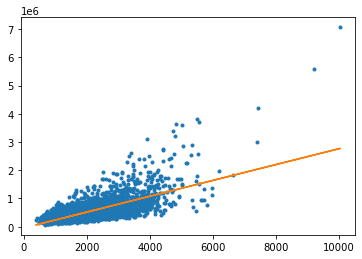

In [74]:
plt.plot(test_data['sqft_living'],test_data['price'],'.',
        test_data['sqft_living'],simple_model.predict(x_test),'-')

Above: blue dots are original data, the orange line is the prediction from the simple regression.

Below: we can view the learned regression coefficients.

The coefficients of sqt model are:

In [76]:
print('Coefficients: \n', simple_model.coef_)

Coefficients: 
 [[280.32770109]]


# Explore other features in the data

To build a more elaborate model, we will explore using more features.